# Analyze Processing Quality

#### Updated: Jan 13, 2023

#  

Analyze the overall quality of the processing of the first batch of Alouette images. Determine that all subdirectories have been processed. Determine which subdirectories have the highest loss - are there any patterns? For instance, do certain rolls have high loss, or images from certain ground stations?

In [35]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [18]:
rootDir = 'L:/DATA/Alouette_I/'
resultDir = rootDir + '05_result/'
logDir = rootDir + '06_log/'

#  

#### Identify outstanding subdirectories to process:

Check from process_log:

Remove duplicates from process_log:

In [19]:
df_process_log = pd.read_csv(logDir + 'process_log.csv')
print(len(df_process_log))
df_process_log.head()

3138


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id
0,R014207978F,319,239,206,5,11,17,259.625649,2022-12-15 23:28:15.951151,Rav,R014207978F_319
1,R014207966,1185-1B,386,0,383,0,3,1415.449691,2022-12-15 23:51:57.608703,Rav,R014207966_1185-1B
2,R014207975,1108-B,363,0,347,4,12,367.330205,2022-12-15 23:58:19.342118,Rav,R014207975_1108-B
3,R014207957,2631-1A,333,0,320,4,9,607.819416,2022-12-16 00:08:43.220755,Rav,R014207957_2631-1A
4,R014207966,1150-B,369,0,362,1,6,775.810147,2022-12-16 00:21:52.993215,Rav,R014207966_1150-B


In [20]:
df_p1 = df_process_log.sort_values('Process_timestamp', ascending=True)
df_p1 = df_p1.drop_duplicates(subset=['subdir_id'], keep='last') 
print(len(df_p1))
df_p1.head()

2638


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id
1,R014207966,1185-1B,386,0,383,0,3,1415.449691,2022-12-15 23:51:57.608703,Rav,R014207966_1185-1B
2,R014207975,1108-B,363,0,347,4,12,367.330205,2022-12-15 23:58:19.342118,Rav,R014207975_1108-B
3,R014207957,2631-1A,333,0,320,4,9,607.819416,2022-12-16 00:08:43.220755,Rav,R014207957_2631-1A
4,R014207966,1150-B,369,0,362,1,6,775.810147,2022-12-16 00:21:52.993215,Rav,R014207966_1150-B
5,R014207979F,288,421,345,3,23,50,157.020877,2022-12-16 00:24:43.050306,Rav,R014207979F_288


In [21]:
df_p1.tail()

,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id
3132,R014207844,2914-43B,0,0,0,0,0,34.631079,2023-01-13 00:17:53.485712,Rav,R014207844_2914-43B
3133,R014207844,2842-43B,0,0,0,0,0,37.198027,2023-01-13 00:18:37.652825,Rav,R014207844_2842-43B
3134,R014207979F,302,0,0,0,0,0,45.856781,2023-01-13 00:19:31.524921,Rav,R014207979F_302
3135,R014207821,3311-15A,0,0,0,0,0,34.835953,2023-01-13 00:20:16.824836,Rav,R014207821_3311-15A
3137,R014207840,3047-53A-2-RR,313,0,259,43,11,501.597934,2023-01-13 13:46:42.301305,Rav,R014207840_3047-53A-2-RR


Look at duplicates from process_log:

In [22]:
df_p1_ = df_process_log[df_process_log.duplicated(subset=['subdir_id'], keep=False)]
df_p1_ = df_p1_.sort_values(['subdir_id', 'Process_timestamp'])
print(len(df_p1_))
df_p1_.head(10)

661


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id
1329,R014207815,3493-8A,290,0,284,1,5,561.010995,2022-12-24 04:40:45.450883,Rav,R014207815_3493-8A
3060,R014207815,3493-8A,287,0,272,2,13,415.501239,2023-01-10 23:50:22.088115,Rav,R014207815_3493-8A
1115,R014207815,3494-8A,290,0,284,1,5,322.571464,2022-12-22 19:41:42.498221,Rav,R014207815_3494-8A
3046,R014207815,3494-8A,262,0,255,2,5,153.804969,2023-01-10 21:53:04.496138,Rav,R014207815_3494-8A
1390,R014207815,3498-8A,290,0,284,1,5,583.659354,2022-12-24 16:33:40.137930,Rav,R014207815_3498-8A
3065,R014207815,3498-8A,270,0,260,1,9,428.864500,2023-01-11 00:22:48.388375,Rav,R014207815_3498-8A
1231,R014207815,3530-5A,337,0,325,5,7,0.807998,2022-12-23 14:37:37.109226,Roksana,R014207815_3530-5A
3051,R014207815,3530-5A,317,0,131,166,20,344.793604,2023-01-10 22:16:41.198520,Rav,R014207815_3530-5A
1457,R014207815,3537-A3,290,0,284,1,5,842.873997,2022-12-25 05:18:24.317487,Rav,R014207815_3537-A3
3071,R014207815,3537-A3,288,0,284,3,1,691.392657,2023-01-11 01:28:57.093333,Rav,R014207815_3537-A3


Find any subdirectories that have not been processed:

In [23]:
df_inventory = pd.read_csv(logDir + 'image_inventory.csv')
print(len(df_inventory))
df_inventory.head()

2638


,Roll,Subdirectory,images,subdir_id
0,R014207815,3488-15A,273,R014207815_3488-15A
1,R014207815,3489-15A,281,R014207815_3489-15A
2,R014207815,3490-15A,198,R014207815_3490-15A
3,R014207815,3491-8A,289,R014207815_3491-8A
4,R014207815,3492-8A,334,R014207815_3492-8A


In [24]:
subdir_ids_tot = df_inventory['subdir_id'].unique()
subdir_ids_proc = df_p1['subdir_id'].unique()
subdir_ids_rem = list(set(subdir_ids_tot) - set(subdir_ids_proc))
subdir_ids_rem

[]

Check from resultDir:

In [9]:
df_result = pd.DataFrame()
i = 0
for file in os.listdir(resultDir):
    if 'R' in file:
        roll = file
        for file2 in os.listdir(resultDir + roll + '/'):
            if 'result' in file2:
                fn_parts = file2.split('_')
                subdirectory = fn_parts[1].replace('.csv', '')
                try:
                    df_load = pd.read_csv(resultDir + roll + '/' + file2, sep=',')
                    n = len(df_load)
                except pd.errors.EmptyDataError:
                    n = 0
                row = pd.DataFrame({
                    'Roll': roll,
                    'Subdirectory': subdirectory,
                    'images_result': n,
                    'subdir_id': roll + '_' + subdirectory
                }, index=[i])
                df_result = pd.concat([df_result, row])
                i += 1
                if i % 100 == 0:
                    print(str(i) + ': Now inspecting...' + roll + '/' + subdirectory)

100: Now inspecting...R014207816/3407-143
200: Now inspecting...R014207823/3567-43A
300: Now inspecting...R014207824/3187-14A
400: Now inspecting...R014207840/3047-53A-2-RR
500: Now inspecting...R014207842/3267-A3
600: Now inspecting...R014207907F/289
700: Now inspecting...R014207908F/586
800: Now inspecting...R014207929F/452
900: Now inspecting...R014207930F/677
1000: Now inspecting...R014207939/882-A
1100: Now inspecting...R014207942/1945-5A
1200: Now inspecting...R014207943/2107-5B
1300: Now inspecting...R014207947/1906-5B
1400: Now inspecting...R014207949/2126-5B
1500: Now inspecting...R014207951/2466-8A
1600: Now inspecting...R014207954/2206-18B
1700: Now inspecting...R014207956/2368-1B
1800: Now inspecting...R014207958/2770-12A
1900: Now inspecting...R014207959/2332-7A
2000: Now inspecting...R014207962/1471-1B
2100: Now inspecting...R014207965/1634-18B
2200: Now inspecting...R014207966/1193-5-A
2300: Now inspecting...R014207968/1235-3A
2400: Now inspecting...R014207974/749-A
2500

In [10]:
print(len(df_result))
df_result.head()

2638


,Roll,Subdirectory,images_result,subdir_id
0,R014207815,3488-15A,273,R014207815_3488-15A
1,R014207815,3489-15A,276,R014207815_3489-15A
2,R014207815,3490-15A,198,R014207815_3490-15A
3,R014207815,3491-8A,289,R014207815_3491-8A
4,R014207815,3492-8A,334,R014207815_3492-8A


In [11]:
subdir_ids_tot = df_inventory['subdir_id'].unique()
subdir_ids_res = df_result['subdir_id'].unique()
subdir_ids_rem = list(set(subdir_ids_tot) - set(subdir_ids_res))
subdir_ids_rem

[]

In [12]:
df_p1_res = df_p1.merge(df_result, on=['Roll', 'Subdirectory', 'subdir_id'], how='left')
print(len(df_p1_res))
df_p1_res.head()

2638


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id,images_result
0,R014207966,1185-1B,386,0,383,0,3,1415.449691,2022-12-15 23:51:57.608703,Rav,R014207966_1185-1B,386
1,R014207975,1108-B,363,0,347,4,12,367.330205,2022-12-15 23:58:19.342118,Rav,R014207975_1108-B,363
2,R014207957,2631-1A,333,0,320,4,9,607.819416,2022-12-16 00:08:43.220755,Rav,R014207957_2631-1A,333
3,R014207966,1150-B,369,0,362,1,6,775.810147,2022-12-16 00:21:52.993215,Rav,R014207966_1150-B,369
4,R014207979F,288,421,345,3,23,50,157.020877,2022-12-16 00:24:43.050306,Rav,R014207979F_288,421


In [13]:
df1 = df_p1_res.loc[df_p1_res['Images_processed'] == 0]
df2 = df_p1_res.loc[df_p1_res['images_result'] == 0]
df3 = df_p1_res.loc[(df_p1_res['Images_processed'] == 0) | (df_p1_res['images_result'] == 0)]
print(len(df1))
print(len(df2))
print(len(df3))
df3.head()

40
40
40


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id,images_result
2539,R014207821,3346-38A,0,0,0,0,0,38.095704,2023-01-10 17:53:11.805510,Rav,R014207821_3346-38A,0
2540,R014207824,3143-14A,0,0,0,0,0,32.883987,2023-01-10 17:53:51.828994,Rav,R014207824_3143-14A,0
2541,R014207842,3259-50A,0,0,0,0,0,34.829748,2023-01-10 17:54:35.556059,Rav,R014207842_3259-50A,0
2542,R014207907F,301,0,0,0,0,0,504.873584,2023-01-10 18:03:06.670546,Rav,R014207907F_301,0
2543,R014207844,2914-43B,0,0,0,0,0,36.678300,2023-01-10 18:03:54.596781,Rav,R014207844_2914-43B,0


Check mapped_coords:

In [14]:
df_mc = pd.DataFrame()
i = 0
for file in os.listdir(resultDir + 'mapped_coords/'):
    if 'R' in file:
        roll = file
        for file2 in os.listdir(resultDir + 'mapped_coords/' + roll + '/'):
            subdirectory = file2
            n = 0
            for file3 in os.listdir(resultDir + 'mapped_coords/' + roll + '/' + subdirectory + '/'):
                if 'mapped_coords' in file3:
                    n += 1
            row = pd.DataFrame({
                'Roll': roll,
                'Subdirectory': subdirectory,
                'mapped_coords_result': n,
                'subdir_id': roll + '_' + subdirectory
            }, index=[i])
            df_mc = pd.concat([df_mc, row])
            i += 1
            if i % 100 == 0:
                    print(str(i) + ': Now inspecting...' + roll + '/' + subdirectory)

100: Now inspecting...R014207816/3407-143
200: Now inspecting...R014207823/3572-19A
300: Now inspecting...R014207832/3618-43-2
400: Now inspecting...R014207840/3064-13B
500: Now inspecting...R014207842/3289-5A
600: Now inspecting...R014207907F/516
700: Now inspecting...R014207909F/697
800: Now inspecting...R014207930F/609
900: Now inspecting...R014207938/936-A
1000: Now inspecting...R014207940F/379
1100: Now inspecting...R014207942/1981-5A
1200: Now inspecting...R014207946/1841-3A
1300: Now inspecting...R014207948/1701-5A
1400: Now inspecting...R014207949/2162-1A
1500: Now inspecting...R014207953/2681-9A
1600: Now inspecting...R014207955/2843-50B
1700: Now inspecting...R014207956/2406-1B
1800: Now inspecting...R014207958/2810-7A
1900: Now inspecting...R014207960/2550-5B
2000: Now inspecting...R014207964/1572-1B
2100: Now inspecting...R014207965/1673-13
2200: Now inspecting...R014207967/1415-13B
2300: Now inspecting...R014207970/1334-16B
2400: Now inspecting...R014207975/1088-A
2500: No

In [15]:
print(len(df_mc))
df_mc.head()

2598


,Roll,Subdirectory,mapped_coords_result,subdir_id
0,R014207815,3488-15A,257,R014207815_3488-15A
1,R014207815,3489-15A,273,R014207815_3489-15A
2,R014207815,3490-15A,192,R014207815_3490-15A
3,R014207815,3491-8A,283,R014207815_3491-8A
4,R014207815,3492-8A,322,R014207815_3492-8A


In [16]:
df_p1_mc = df_p1.merge(df_mc, on=['Roll', 'Subdirectory', 'subdir_id'], how='left')
print(len(df_p1_mc))
df_p1_mc.head()

2638


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id,mapped_coords_result
0,R014207966,1185-1B,386,0,383,0,3,1415.449691,2022-12-15 23:51:57.608703,Rav,R014207966_1185-1B,385.0
1,R014207975,1108-B,363,0,347,4,12,367.330205,2022-12-15 23:58:19.342118,Rav,R014207975_1108-B,348.0
2,R014207957,2631-1A,333,0,320,4,9,607.819416,2022-12-16 00:08:43.220755,Rav,R014207957_2631-1A,321.0
3,R014207966,1150-B,369,0,362,1,6,775.810147,2022-12-16 00:21:52.993215,Rav,R014207966_1150-B,362.0
4,R014207979F,288,421,345,3,23,50,157.020877,2022-12-16 00:24:43.050306,Rav,R014207979F_288,348.0


In [17]:
df1 = df_p1_mc.loc[df_p1_mc['Images_processed'] == 0]
df2 = df_p1_mc.loc[df_p1_mc['mapped_coords_result'] == 0]
df2a = df_p1_mc.loc[df_p1_mc['mapped_coords_result'].isnull()]
df3 = df_p1_mc.loc[(df_p1_mc['Images_processed'] == 0) | (df_p1_mc['mapped_coords_result'] == 0)]
print(len(df1))
print(len(df2))
print(len(df2a))
print(len(df3))
df3

40
0
40
40


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id,mapped_coords_result
2539,R014207821,3346-38A,0,0,0,0,0,38.095704,2023-01-10 17:53:11.805510,Rav,R014207821_3346-38A,NaN
2540,R014207824,3143-14A,0,0,0,0,0,32.883987,2023-01-10 17:53:51.828994,Rav,R014207824_3143-14A,NaN
2541,R014207842,3259-50A,0,0,0,0,0,34.829748,2023-01-10 17:54:35.556059,Rav,R014207842_3259-50A,NaN
2542,R014207907F,301,0,0,0,0,0,504.873584,2023-01-10 18:03:06.670546,Rav,R014207907F_301,NaN
2543,R014207844,2914-43B,0,0,0,0,0,36.678300,2023-01-10 18:03:54.596781,Rav,R014207844_2914-43B,NaN
2544,R014207844,2842-43B,0,0,0,0,0,38.916743,2023-01-10 18:04:45.251761,Rav,R014207844_2842-43B,NaN
2545,R014207842,3304-15A,0,0,0,0,0,40.491445,2023-01-10 18:05:35.342069,Rav,R014207842_3304-15A,NaN
2546,R014207842,3277-3B,0,0,0,0,0,39.547912,2023-01-10 18:06:23.796641,Rav,R014207842_3277-3B,NaN
2547,R014207824,3144-13B,0,0,0,0,0,45.600797,2023-01-10 18:07:16.436956,Rav,R014207824_3144-13B,NaN
2548,R014207844,2942-43B,0,0,0,0,0,40.567378,2023-01-10 18:08:06.127293,Rav,R014207844_2942-43B,NaN


In [18]:
df4 = df_p1_mc.loc[(df_p1_mc['Images_processed'] != 0) & (df_p1_mc['mapped_coords_result'].isnull())]
print(len(df4))
df4

0


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id,mapped_coords_result


In [19]:
#df4.to_csv(logDir + 'reprocess_list.csv', index=False)

#  

#### Identify 0 Images_processed subdirectories, and try to process again:

In [25]:
df_p2 = df_p1.sort_values('Images_processed').reset_index(drop=True)
df_p2 = df_p2.loc[df_p2['Images_processed'] == 0]
print(len(df_p2))
df_p2.head()

40


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id
0,R014207955,2850-50B,0,0,0,0,0,42.441835,2023-01-12 23:33:38.804438,Rav,R014207955_2850-50B
1,R014207842,3259-50A,0,0,0,0,0,32.843553,2023-01-12 23:56:37.686532,Rav,R014207842_3259-50A
2,R014207821,3311-15A,0,0,0,0,0,34.835953,2023-01-13 00:20:16.824836,Rav,R014207821_3311-15A
3,R014207844,2942-43B,0,0,0,0,0,45.744302,2023-01-12 23:55:57.121768,Rav,R014207844_2942-43B
4,R014207907F,527,0,0,0,0,0,24.732695,2023-01-12 23:55:03.095192,Rav,R014207907F_527


In [20]:
#df_p2.to_csv(logDir + 'reprocess_list.csv', index=False)

#  

#### Order subdirectories by percent 'total loss' (unprocessed + loss + outlier):

Compare process_log with download_log:

In [26]:
df_download_log = pd.read_csv(logDir + 'download_log.csv')
print(len(df_download_log))
df_download_log.head()

2640


,Roll,Subdirectory,Images_downloaded,Download_time,Download_timestamp,User,subdir_id
0,R014207966,1185-1B,388,103.911195,2022-12-15 23:26:13.703970,Rav,R014207966_1185-1B
1,R014207975,1108-B,364,100.474518,2022-12-15 23:32:54.868807,Rav,R014207975_1108-B
2,R014207957,2631-1A,335,63.127634,2022-12-15 23:53:58.671362,Rav,R014207957_2631-1A
3,R014207966,1150-B,369,95.732583,2022-12-16 00:00:35.088810,Rav,R014207966_1150-B
4,R014207979F,288,421,75.788788,2022-12-16 00:11:51.540555,Rav,R014207979F_288


In [27]:
df_d1 = df_download_log.sort_values('Download_timestamp', ascending=True)
df_d1 = df_d1.drop_duplicates(subset=['subdir_id'], keep='last')
df_d1 = df_d1.rename(columns={
    'User': 'User_dl'
})
print(len(df_d1))
df_d1.head()

2638


,Roll,Subdirectory,Images_downloaded,Download_time,Download_timestamp,User_dl,subdir_id
0,R014207966,1185-1B,388,103.911195,2022-12-15 23:26:13.703970,Rav,R014207966_1185-1B
1,R014207975,1108-B,364,100.474518,2022-12-15 23:32:54.868807,Rav,R014207975_1108-B
2,R014207957,2631-1A,335,63.127634,2022-12-15 23:53:58.671362,Rav,R014207957_2631-1A
3,R014207966,1150-B,369,95.732583,2022-12-16 00:00:35.088810,Rav,R014207966_1150-B
4,R014207979F,288,421,75.788788,2022-12-16 00:11:51.540555,Rav,R014207979F_288


In [28]:
df_d1_ = df_download_log[df_download_log.duplicated(subset=['subdir_id'], keep=False)]
df_d1_ = df_d1_.sort_values(['subdir_id', 'Download_timestamp'])
print(len(df_d1_))
df_d1_.head(10)

4


,Roll,Subdirectory,Images_downloaded,Download_time,Download_timestamp,User,subdir_id
653,R014207840,3047-53A-2-RR,313,76.046123,2022-12-20 16:22:28.320731,Rav,R014207840_3047-53A-2-RR
2639,R014207840,3047-53A-2-RR,313,75.681498,2023-01-13 13:07:27.940145,Rav,R014207840_3047-53A-2-RR
978,R014207949,2114-1A,341,86.235073,2022-12-21 16:22:32.687731,Roksana,R014207949_2114-1A
2638,R014207949,2114-1A,341,84.204622,2023-01-06 18:10:28.619273,Rav,R014207949_2114-1A


In [29]:
df1 = df_p1.merge(df_d1, on=['Roll', 'Subdirectory', 'subdir_id'])
print(len(df1))
df1.head()

2638


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id,Images_downloaded,Download_time,Download_timestamp,User_dl
0,R014207966,1185-1B,386,0,383,0,3,1415.449691,2022-12-15 23:51:57.608703,Rav,R014207966_1185-1B,388,103.911195,2022-12-15 23:26:13.703970,Rav
1,R014207975,1108-B,363,0,347,4,12,367.330205,2022-12-15 23:58:19.342118,Rav,R014207975_1108-B,364,100.474518,2022-12-15 23:32:54.868807,Rav
2,R014207957,2631-1A,333,0,320,4,9,607.819416,2022-12-16 00:08:43.220755,Rav,R014207957_2631-1A,335,63.127634,2022-12-15 23:53:58.671362,Rav
3,R014207966,1150-B,369,0,362,1,6,775.810147,2022-12-16 00:21:52.993215,Rav,R014207966_1150-B,369,95.732583,2022-12-16 00:00:35.088810,Rav
4,R014207979F,288,421,345,3,23,50,157.020877,2022-12-16 00:24:43.050306,Rav,R014207979F_288,421,75.788788,2022-12-16 00:11:51.540555,Rav


In [30]:
df1['Images_unprocessed'] = df1['Images_downloaded'] - df1['Images_processed']
df1.head()

,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id,Images_downloaded,Download_time,Download_timestamp,User_dl,Images_unprocessed
0,R014207966,1185-1B,386,0,383,0,3,1415.449691,2022-12-15 23:51:57.608703,Rav,R014207966_1185-1B,388,103.911195,2022-12-15 23:26:13.703970,Rav,2
1,R014207975,1108-B,363,0,347,4,12,367.330205,2022-12-15 23:58:19.342118,Rav,R014207975_1108-B,364,100.474518,2022-12-15 23:32:54.868807,Rav,1
2,R014207957,2631-1A,333,0,320,4,9,607.819416,2022-12-16 00:08:43.220755,Rav,R014207957_2631-1A,335,63.127634,2022-12-15 23:53:58.671362,Rav,2
3,R014207966,1150-B,369,0,362,1,6,775.810147,2022-12-16 00:21:52.993215,Rav,R014207966_1150-B,369,95.732583,2022-12-16 00:00:35.088810,Rav,0
4,R014207979F,288,421,345,3,23,50,157.020877,2022-12-16 00:24:43.050306,Rav,R014207979F_288,421,75.788788,2022-12-16 00:11:51.540555,Rav,0


#  

Negative Images_unprocessed issue - reprocess these subdirectories:

In [31]:
df2 = df1.loc[df1['Images_unprocessed'] < 0]
print(len(df2))
df2.head()

0


,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id,Images_downloaded,Download_time,Download_timestamp,User_dl,Images_unprocessed


In [16]:
#df2.to_csv(logDir + 'reprocess_list.csv', index=False)

#  

Calculate percent 'total loss':

In [34]:
df1['Images_total_loss'] = df1['Images_unprocessed'] + df1['Images_loss'] + df1['Images_outlier']
df1['pc_total_loss'] = df1['Images_total_loss']/df1['Images_downloaded']
df1['pc_unprocessed'] = df1['Images_unprocessed']/df1['Images_downloaded']
df1['pc_processed'] = df1['Images_processed']/df1['Images_downloaded']
df1['pc_dot'] = df1['Images_dot']/df1['Images_downloaded']
df1['pc_num'] = df1['Images_num']/df1['Images_downloaded']
df1['pc_loss'] = df1['Images_loss']/df1['Images_downloaded']
df1['pc_outlier'] = df1['Images_outlier']/df1['Images_downloaded']
df2 = df1.sort_values('pc_total_loss', ascending=False).reset_index(drop=True)
df2.head()

,Roll,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,...,User_dl,Images_unprocessed,Images_total_loss,pc_total_loss,pc_unprocessed,pc_processed,pc_dot,pc_num,pc_loss,pc_outlier
0,R014207840,3045-13B,253,0,0,250,3,303.508292,2022-12-20 03:01:49.111073,Roksana,...,Roksana,0,253,1.0,0.000000,1.000000,0.0,0.0,0.988142,0.011858
1,R014207842,3275-3A,0,0,0,0,0,27.997166,2023-01-13 00:04:21.123184,Rav,...,Roksana,178,178,1.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000
2,R014207957,2601-18B,13,0,0,1,12,941.761354,2022-12-30 08:21:44.525225,Rav,...,Rav,306,319,1.0,0.959248,0.040752,0.0,0.0,0.003135,0.037618
3,R014207929F,458,0,0,0,0,0,26.192818,2023-01-12 23:51:12.102173,Rav,...,Rav,407,407,1.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000
4,R014207953,2694-13B,12,0,0,2,10,460.155521,2022-12-30 03:14:44.607553,Rav,...,Rav,295,307,1.0,0.960912,0.039088,0.0,0.0,0.006515,0.032573


#  

#### Plot histograms to characterize quality of processed subdirectories:

<AxesSubplot:xlabel='pc_total_loss', ylabel='Count'>

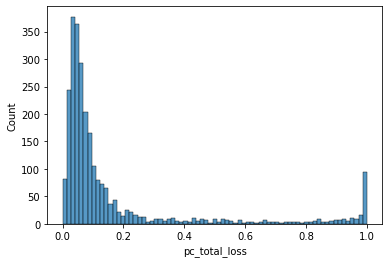

In [36]:
sns.histplot(data=df2, x='pc_total_loss')

<AxesSubplot:xlabel='pc_unprocessed', ylabel='Count'>

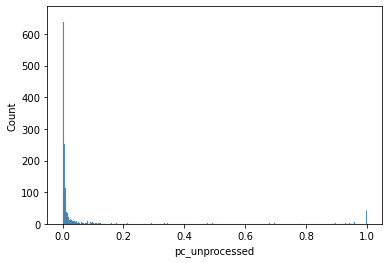

In [37]:
sns.histplot(data=df2, x='pc_unprocessed')

<AxesSubplot:xlabel='pc_dot', ylabel='Count'>

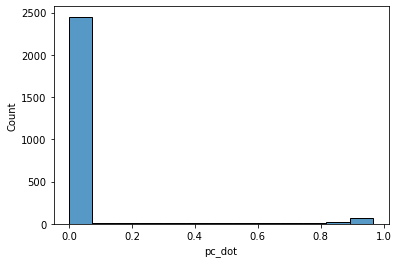

In [38]:
sns.histplot(data=df2, x='pc_dot')

<AxesSubplot:xlabel='pc_num', ylabel='Count'>

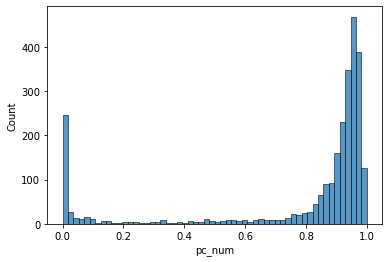

In [39]:
sns.histplot(data=df2, x='pc_num')

<AxesSubplot:xlabel='pc_loss', ylabel='Count'>

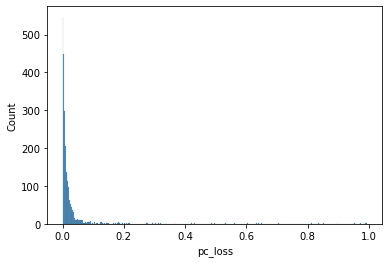

In [40]:
sns.histplot(data=df2, x='pc_loss')

<AxesSubplot:xlabel='pc_outlier', ylabel='Count'>

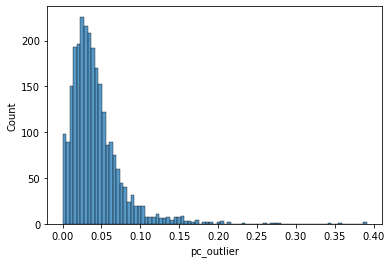

In [41]:
sns.histplot(data=df2, x='pc_outlier')

#  

#### Concatenate results into one dataset, count total number of images processed without loss:

In [46]:
df_result = pd.DataFrame()
for file in os.listdir(resultDir):
    if 'R' in file:
        print('Reading...' + file)
        for file2 in os.listdir(resultDir + file):
            if 'result' in file2:
                try:
                    df_load = pd.read_csv(resultDir + file + '/' + file2)
                    df_result = pd.concat([df_result, df_load])
                except pd.errors.EmptyDataError:
                    continue

Reading...R014207815
Reading...R014207816
Reading...R014207821
Reading...R014207823
Reading...R014207824
Reading...R014207832
Reading...R014207840
Reading...R014207841
Reading...R014207842
Reading...R014207844
Reading...R014207907F
Reading...R014207908F
Reading...R014207909F
Reading...R014207929F
Reading...R014207930F
Reading...R014207938
Reading...R014207939
Reading...R014207940F
Reading...R014207942
Reading...R014207943
Reading...R014207946
Reading...R014207947
Reading...R014207948
Reading...R014207949
Reading...R014207951
Reading...R014207953
Reading...R014207954
Reading...R014207955
Reading...R014207956
Reading...R014207957
Reading...R014207958
Reading...R014207959
Reading...R014207960
Reading...R014207962
Reading...R014207964
Reading...R014207965
Reading...R014207966
Reading...R014207967
Reading...R014207968
Reading...R014207970
Reading...R014207974
Reading...R014207975
Reading...R014207978F
Reading...R014207979F
Reading...R014207980


In [49]:
print(len(df_result))
df_result.head()

817910


,fmin,max_depth,satellite_number,year,day,hour,minute,second,station_number,Station Name,...,raw_coord,window_coord,mapping_Hz,mapping_km,details,Roll,Subdirectory,filename,rotated_metadata,station_code
0,1.5,387.500000,1.0,1961.0,3.0,2.0,2.0,3.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,10.png,NaN,NaN
1,1.5,556.250000,1.0,1961.0,2.0,2.0,2.0,3.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,101.png,NaN,NaN
2,1.5,654.166667,0.0,1960.0,2.0,2.0,3.0,2.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,102.png,NaN,NaN
3,1.5,504.166667,0.0,1960.0,2.0,2.0,3.0,2.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,106.png,NaN,NaN
4,1.5,504.166667,0.0,1961.0,2.0,2.0,2.0,3.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,107.png,NaN,NaN


In [48]:
df_result.to_csv(resultDir + 'result_total.csv', index=False)

In [50]:
df_result.columns

Index(['fmin', 'max_depth', 'satellite_number', 'year', 'day', 'hour',
       'minute', 'second', 'station_number', 'Station Name', '3 - Letter Code',
       'LAT.', 'LONG. ', 'processed_image_class', 'func_name', 'limits',
       'height', 'width', 'metadata_type', 'meta_height', 'meta_width',
       'x_centroids', 'y_centroids', 'is_dot', 'dict_metadata', 'raw_coord',
       'window_coord', 'mapping_Hz', 'mapping_km', 'details', 'Roll',
       'Subdirectory', 'filename', 'rotated_metadata', 'station_code'],
      dtype='object')

In [52]:
df_result['processed_image_class'].unique()

array(['num', 'loss', 'outlier', 'dot'], dtype=object)

In [53]:
df3 = df_result.loc[(df_result['processed_image_class'] == 'num') | (df_result['processed_image_class'] == 'dot')]
print(len(df3))
df3.head()

739411


,fmin,max_depth,satellite_number,year,day,hour,minute,second,station_number,Station Name,...,raw_coord,window_coord,mapping_Hz,mapping_km,details,Roll,Subdirectory,filename,rotated_metadata,station_code
0,1.5,387.500000,1.0,1961.0,3.0,2.0,2.0,3.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,10.png,NaN,NaN
1,1.5,556.250000,1.0,1961.0,2.0,2.0,2.0,3.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,101.png,NaN,NaN
2,1.5,654.166667,0.0,1960.0,2.0,2.0,3.0,2.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,102.png,NaN,NaN
3,1.5,504.166667,0.0,1960.0,2.0,2.0,3.0,2.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,106.png,NaN,NaN
4,1.5,504.166667,0.0,1961.0,2.0,2.0,2.0,3.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,107.png,NaN,NaN


In [54]:
len(df3)/len(df_result)

0.9040248927143574

In [55]:
df_d1['Images_downloaded'].sum()

886320

In [56]:
len(df3)/df_d1['Images_downloaded'].sum()

0.8342483527394169